# Analysis to reproduce results in paper "Friction Interventions to Curb the Spread of Misinformation on Social Media"

### Content <br>
1. Data Load
2. Join Data Frames
3. Plots: Quality and Discriminative Power <br>
    3.1 Fig. 2 in Paper   <br>
    3.2 Fig. 3 in Paper   <br>

In [1]:
from matplotlib import cm 
import gzip
import matplotlib.pyplot as plt
import csv
import numpy as np 
import glob 
import json
import os
import pandas as pd
import seaborn as sns
#import infosys.utils as utils 
from collections import defaultdict
cmap = cm.get_cmap('inferno', 10)
import random
from scipy.stats import sem
import scienceplots



### 1. Data Load

Load all data and arrange in dataframe

In [2]:
result_dir = 'results/30122022_eps_00001_friction_vary_friction_and_learning_and_network_10_runs_final'
verbose_dir = 'verbose/30122022_eps_00001_friction_vary_friction_and_learning_and_network_10_runs_final'

In [3]:
# look at single results file
data = json.load(open(os.path.join(result_dir,'mu_fr_0.0-learn_fr_0.0-network_NW_0.gml+NW_0.gml.json')))
df = pd.DataFrame.from_dict(data, orient='columns')
df

,mu_friction,learning_friction,human_network,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,alpha,theta,pass_friction,truncation_interval,check_conv,graph_gml,mode,quality,diversity,discriminative_pow
0,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.302742,4.542105,"[0.0008763388635141357, 0.5101097356910109]"
1,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.347928,4.658865,"[0.0006137843017435824, 0.7627277607410459]"
2,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.328281,4.435550,"[-0.0005488632425641539, 0.7127725970058028]"
3,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.371682,4.906297,"[0.002302291843931395, 0.26539191947502927]"
4,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.323668,4.825398,"[0.001586070829569974, 0.21500116715175344]"
5,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.309577,4.839006,"[0.00013642319217380721, 0.9215130551155531]"
6,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.324626,4.823123,"[-0.0005675935185820473, 0.6821392649207911]"
7,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.322565,4.553565,"[-0.0007501193404773108, 0.6593041758174916]"
8,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.383209,4.816687,"[0.0001052153160897178, 0.9557174577887598]"
9,0.0,0.0,NW_0.gml,None,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.349410,4.246086,"[0.0007882069705031361, 0.6169688825163033]"


In [4]:
filenames = glob.glob(os.path.join(result_dir,'*json*')) 
len(filenames) # inspect number of files

4065

### 2. Join Data Frames

In [5]:
dfs = [] # an empty list to store the data frames
for file in filenames:
    data = pd.read_json(file, orient='columns') # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [6]:
temp.head()
#data = pd.read_json('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json', orient='columns')

,mu_friction,learning_friction,human_network,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,alpha,theta,pass_friction,truncation_interval,check_conv,graph_gml,mode,quality,diversity,discriminative_pow
0,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.439501,4.962016,"[0.10118845466603, 0.0]"
1,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.458156,4.931333,"[0.10029198770427401, 0.0]"
2,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.423002,5.061073,"[0.10003757026080501, 0.0]"
3,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.490386,4.923491,"[0.09778091282600701, 0.0]"
4,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.427797,4.956169,"[0.10316839486753901, 0.0]"


In [7]:
temp

,mu_friction,learning_friction,human_network,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,alpha,theta,pass_friction,truncation_interval,check_conv,graph_gml,mode,quality,diversity,discriminative_pow
0,0.16,0.80,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.439501,4.962016,"[0.10118845466603, 0.0]"
1,0.16,0.80,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.458156,4.931333,"[0.10029198770427401, 0.0]"
2,0.16,0.80,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.423002,5.061073,"[0.10003757026080501, 0.0]"
3,0.16,0.80,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.490386,4.923491,"[0.09778091282600701, 0.0]"
4,0.16,0.80,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.427797,4.956169,"[0.10316839486753901, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40645,0.60,0.18,NW_4089.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.352418,5.499679,"[0.023700282298792, 2.8304278722850782e-43]"
40646,0.60,0.18,NW_4089.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.361639,5.473148,"[0.026665830575365004, 2.3030696757161284e-43]"
40647,0.60,0.18,NW_4089.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.358345,5.582628,"[0.025602310975883003, 1.003099903271131e-63]"
40648,0.60,0.18,NW_4089.gml,NaN,0,0,True,False,0.00001,0.5,...,15,1,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.373091,5.605298,"[0.024044082834037, 9.302057658684562e-33]"


In [8]:
# make discriminative_pow column two columns
temp[['dicriminative_pow_tau','dicriminative_pow_pval']] = pd.DataFrame(temp.discriminative_pow.tolist(), index= temp.index)

In [9]:
temp.head()

,mu_friction,learning_friction,human_network,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,pass_friction,truncation_interval,check_conv,graph_gml,mode,quality,diversity,discriminative_pow,dicriminative_pow_tau,dicriminative_pow_pval
0,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.439501,4.962016,"[0.10118845466603, 0.0]",0.101188,0.0
1,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.458156,4.931333,"[0.10029198770427401, 0.0]",0.100292,0.0
2,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.423002,5.061073,"[0.10003757026080501, 0.0]",0.100038,0.0
3,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.490386,4.923491,"[0.09778091282600701, 0.0]",0.097781,0.0
4,0.16,0.8,NW_3080.gml,NaN,0,0,True,False,0.00001,0.5,...,0,0,True,/N/u/*user*/Quartz/marketplace/Friction/data/i...,igraph,0.427797,4.956169,"[0.10316839486753901, 0.0]",0.103168,0.0


In [10]:
# quality table
qual_agg = temp.groupby(['mu_friction', 'learning_friction','truncation_interval'])['quality'].agg(['mean', 'sem']).reset_index()
# this makes hierarchical index qual_agg_2 = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std'])

In [11]:
qual_agg.head()

,mu_friction,learning_friction,truncation_interval,mean,sem
0,0.00,0.00,0,0.348361,0.003482
1,0.01,0.00,0,0.342015,0.003679
2,0.01,0.01,0,0.349042,0.003668
3,0.01,0.02,0,0.355101,0.003531
4,0.01,0.03,0,0.350923,0.003071


In [12]:
# diversity table
div_agg = temp.groupby(['mu_friction', 'learning_friction'])['diversity'].agg(['mean', 'sem']).reset_index()

In [13]:
# disrcriminative power table
dp_agg = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_tau'].agg(['mean', 'sem']).reset_index()


In [14]:
dp_agg_pval = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_pval'].agg(['mean', 'sem']).reset_index()

In [22]:
dp_agg.loc[:,'mean'].max() # With induced friction levels as little as $f=0.1$ and associated learning $\ell=0.1$, we find higher correlation between post popularity and quality. 
# Discriminative power is highest for higher $\ell$ and $f$ between $0.1$ and $0.2$: $\tau$ increases up to $0.138$.

0.13869855845144283

In [24]:
dp_agg.loc[dp_agg.loc[:,'mean']==0.13869855845144283]

,mu_friction,learning_friction,mean,sem
580,0.2,1.0,0.138699,0.000379


### 3. Plots: Quality and Discriminative Power

In [36]:
def frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title):
    fig, ax = plt.subplots()
    clrs = sns.color_palette("husl", 10)
    with sns.axes_style("darkgrid"):

        meanst = no_learn['mean']
        sdt = no_learn['sem']
    
        meanst_learn_10 = learn_10['mean']
        sdt_learn_10 = learn_10['sem']
        
        meanst_learn_1 = learn_1['mean']
        sdt_learn_1 = learn_1['sem']
        
        meanst_learn_50 = learn_50['mean']
        sdt_learn_50 = learn_50['sem']

        meanst_learn_100 = learn_100['mean']
        sdt_learn_100 = learn_100['sem']
    
        ax.plot(pd.unique(no_learn['mu_friction']), meanst,label = r'$\ell = 0 $', c=clrs[7], linestyle='-')
        ax.fill_between(pd.unique(no_learn['mu_friction']), meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[7])
    
        ax.plot(np.insert(pd.unique(learn_1['mu_friction']),0,0), np.insert([meanst_learn_1],0,meanst[0]),  label = r'$\ell = 0.01 $',c=clrs[1], linestyle='dashdot')
        ax.fill_between(np.insert(pd.unique(learn_1['mu_friction']),0,0), np.insert([meanst_learn_1-sdt_learn_1],0,(meanst-sdt)[0]), np.insert([meanst_learn_1+sdt_learn_1],0,(meanst+sdt)[0]) ,alpha=0.3, facecolor=clrs[1])

        ax.plot(np.insert(pd.unique(learn_10['mu_friction']),0,0), np.insert([meanst_learn_10],0,meanst[0]),  label = r'$\ell = 0.1 $',c=clrs[0], linestyle='--')
        ax.fill_between(np.insert(pd.unique(learn_10['mu_friction']),0,0), np.insert([meanst_learn_10-sdt_learn_10],0,(meanst-sdt)[0]), np.insert([meanst_learn_10+sdt_learn_10],0,(meanst+sdt)[0]) ,alpha=0.3, facecolor=clrs[0])
   
        ax.plot(np.insert(pd.unique(learn_50['mu_friction']),0,0), np.insert([meanst_learn_50],0,meanst[0]),  label = r'$\ell = 0.5 $',c=clrs[3], linestyle='dotted')
        ax.fill_between(np.insert(pd.unique(learn_50['mu_friction']),0,0), np.insert([meanst_learn_50-sdt_learn_50],0,(meanst-sdt)[0]), np.insert([meanst_learn_50+sdt_learn_50],0,(meanst+sdt)[0]) ,alpha=0.3, facecolor=clrs[3])

        ax.plot(np.insert(pd.unique(learn_100['mu_friction']),0,0), np.insert([meanst_learn_100],0,meanst[0]),  label = r'$\ell = 1 $',c=clrs[8], dashes=[3,6,3,6,3,18])
        ax.fill_between(np.insert(pd.unique(learn_100['mu_friction']),0,0), np.insert([meanst_learn_100-sdt_learn_100],0,(meanst-sdt)[0]), np.insert([meanst_learn_100+sdt_learn_100],0,(meanst+sdt)[0]) ,alpha=0.3, facecolor=clrs[8])

        #ax.set_xlim([0, .5])

        ax.legend(loc='upper center', bbox_to_anchor=(0.2, 0.3, 0.5, 0.5), ncol = 2)
        #ax.set_yscale('log')
        plt.xlabel(r'$f$')
        fig.set_tight_layout(True)
        plt.ylabel(ylabel)
        ax.set_title(title)

        plt.savefig(savename)  

#### 3.1 Fig. 2 in Paper

<Figure size 8000x4000 with 0 Axes>

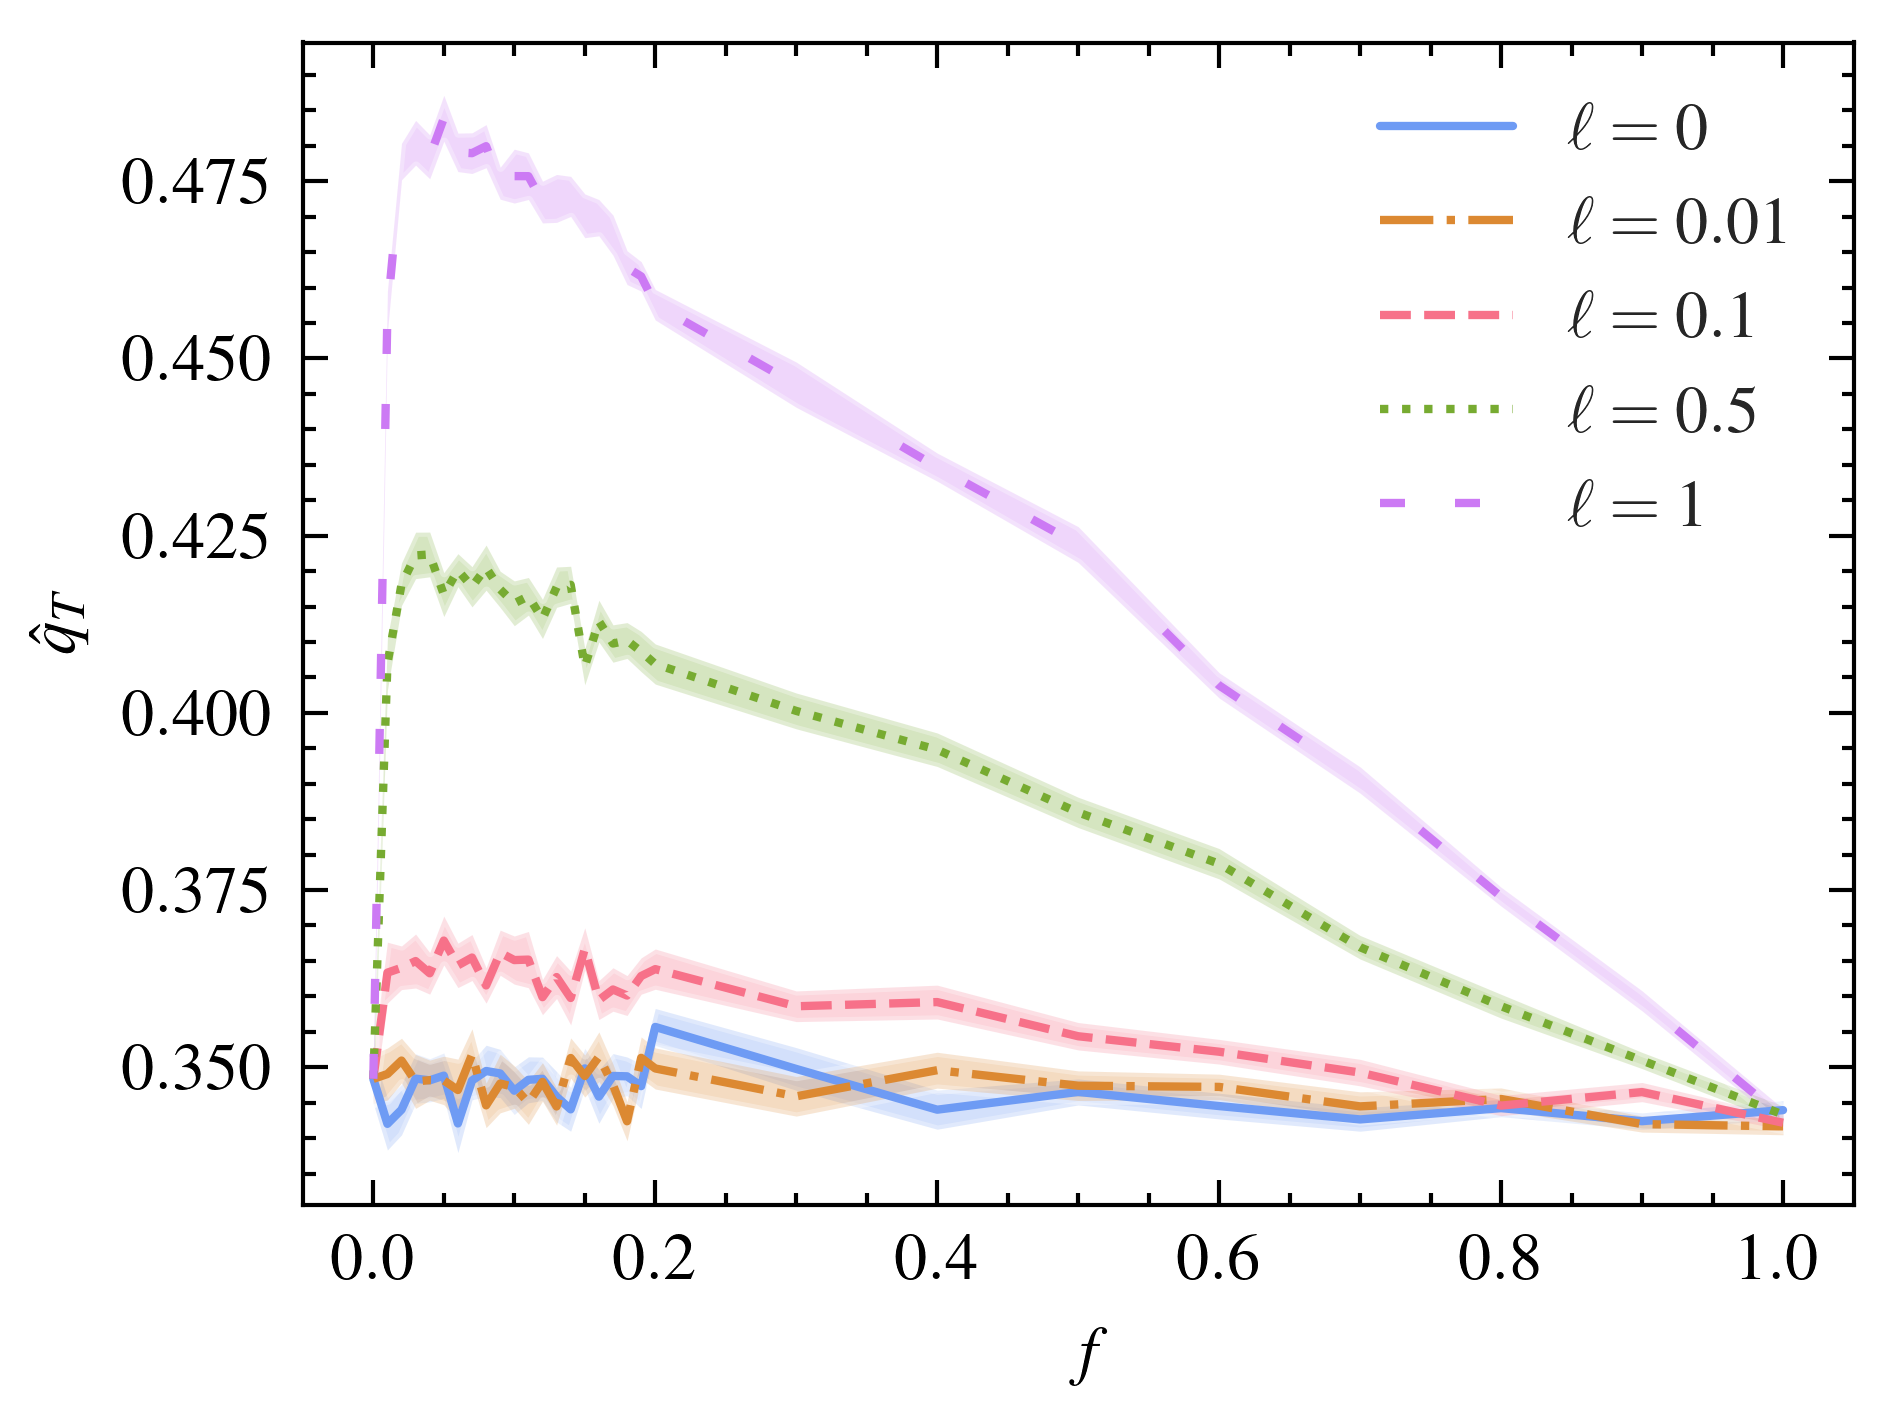

In [23]:
# Final extensive run: rho =.99, eps = .00001
plt.style.use(['science','ieee'])
plt.figure(figsize=(8, 4), dpi=1000)

no_learn = qual_agg.loc[(qual_agg['learning_friction'] == 0.0) ] 
learn_10 = qual_agg.loc[(qual_agg['learning_friction'] ==0.1)]# & (qual_agg['learning_friction'] < 0.10) ]
learn_1 = qual_agg.loc[(qual_agg['learning_friction'] == 0.01)] #& (qual_agg['learning_friction'] < 0.013) ]
learn_50 = qual_agg.loc[(qual_agg['learning_friction'] == 0.5)]# & (qual_agg['learning_friction'] < 0.55) ]
learn_100 = qual_agg.loc[(qual_agg['learning_friction'] ==  1) ]

ylabel = r'$\hat{q}_{T}$'
savename = 'line_plot_quality_and_learning__50_runs_2023_eps0.00001_rho.99.pdf'
title = ''
frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)

#### 3.2 Fig. 3 in Paper

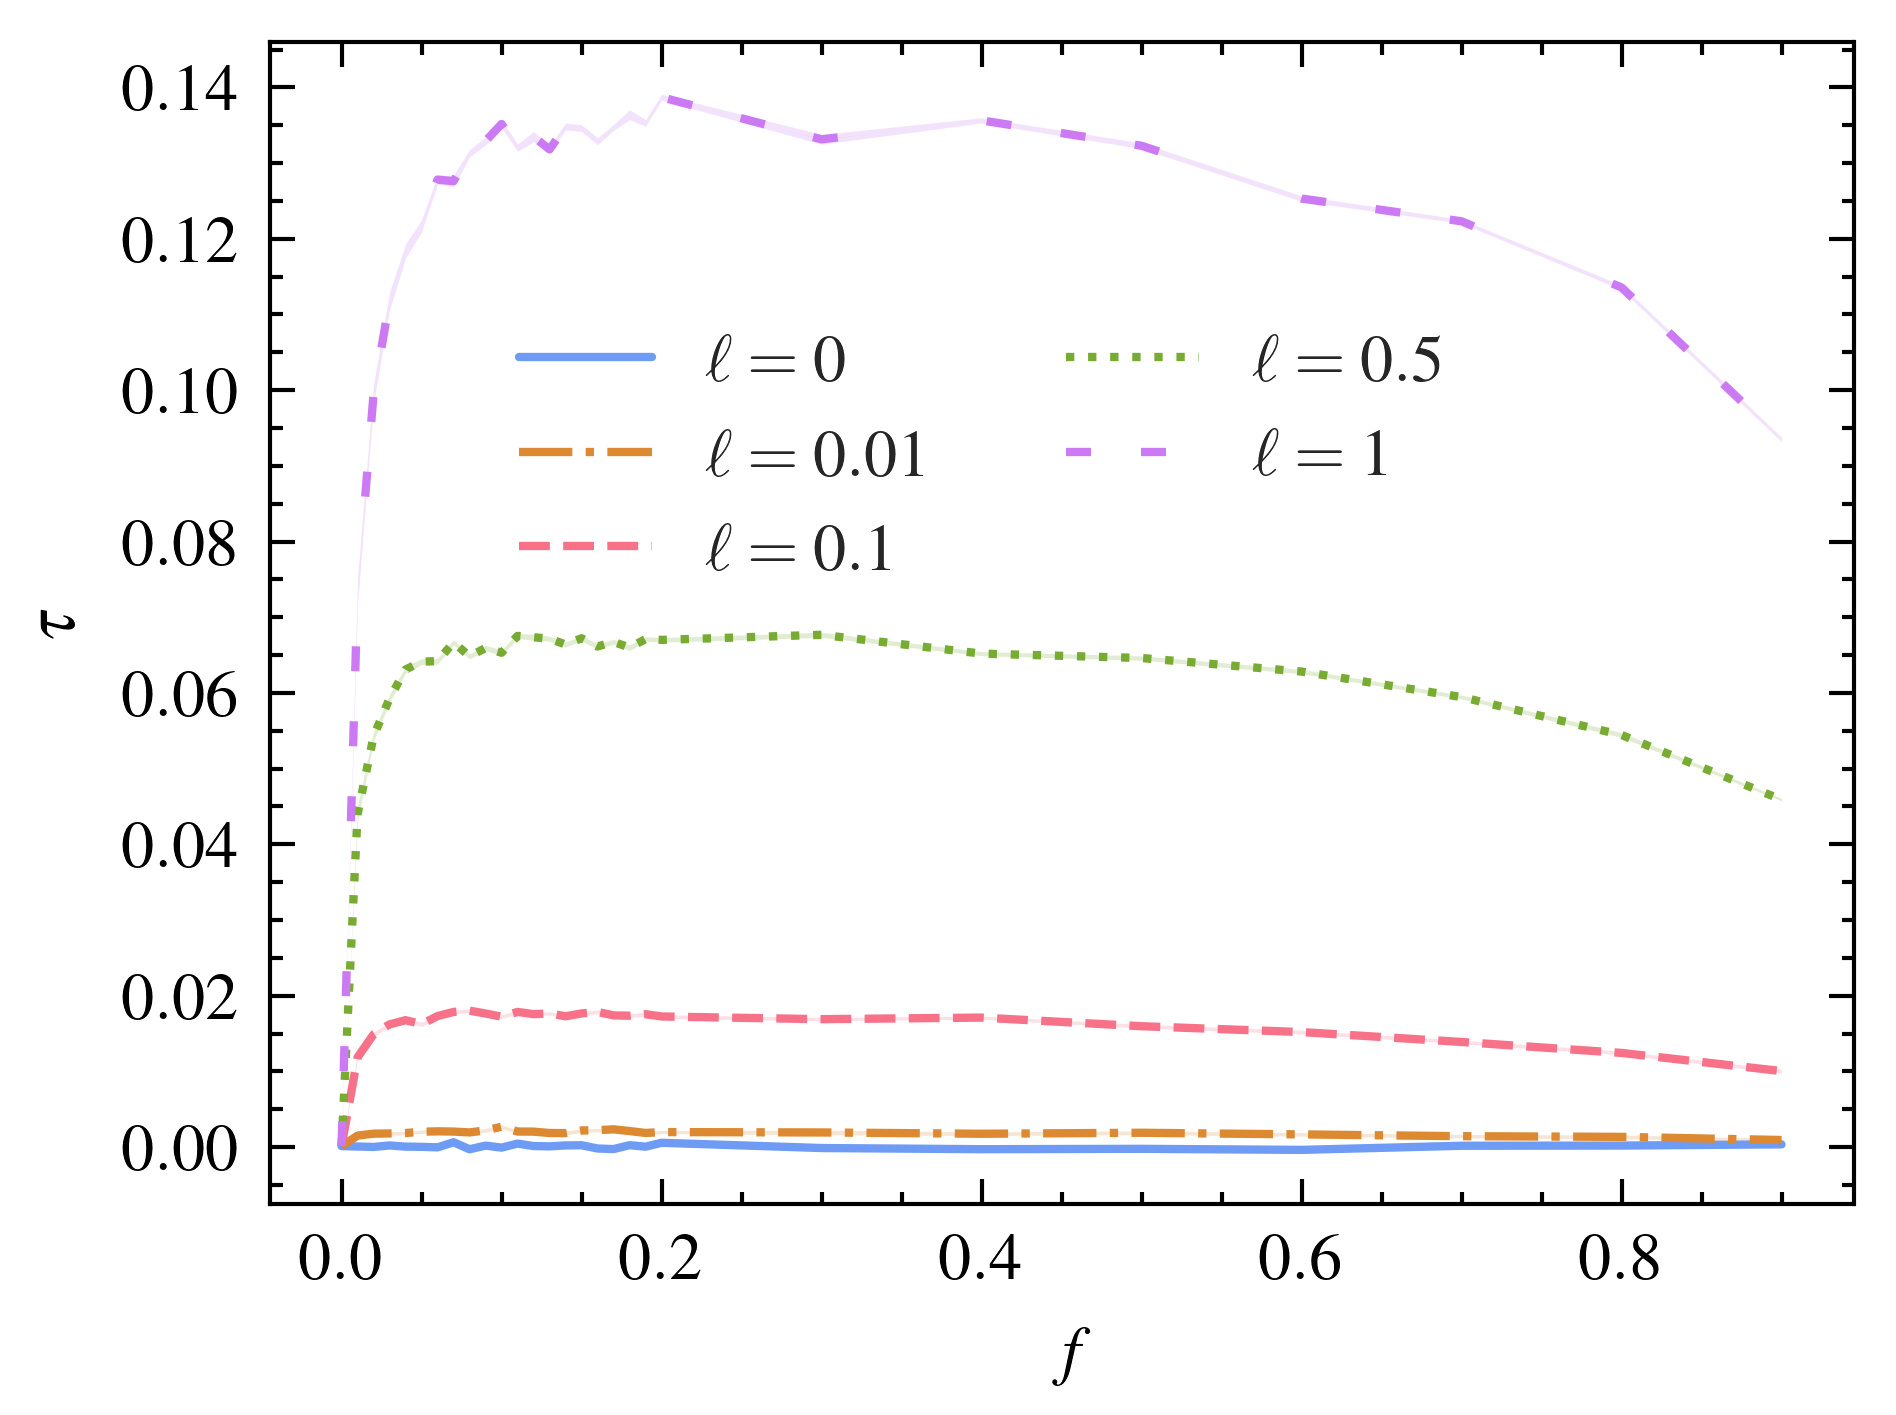

In [37]:
# test rho =.99, eps = .00001
plt.style.use(['science','ieee'])

no_learn = dp_agg.loc[(dp_agg['learning_friction'] == 0.0) ] 
learn_10 = dp_agg.loc[(dp_agg['learning_friction'] == 0.1) ]#& (dp_agg['learning_friction'] < 0.23) ]
learn_1 = dp_agg.loc[(dp_agg['learning_friction'] == 0.01)]# & (dp_agg['learning_friction'] < 0.013) ]
learn_50 = dp_agg.loc[(dp_agg['learning_friction'] ==.5)]# & (dp_agg['learning_friction'] < 0.65) ]
learn_100 = dp_agg.loc[(dp_agg['learning_friction'] == 1) ]

ylabel = r'$\tau $'
savename = 'line_plot_discriminativepower_and_learning__50_runs_2023_eps0.00001_rho.99_edit_legend.pdf'
title = ''
frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)